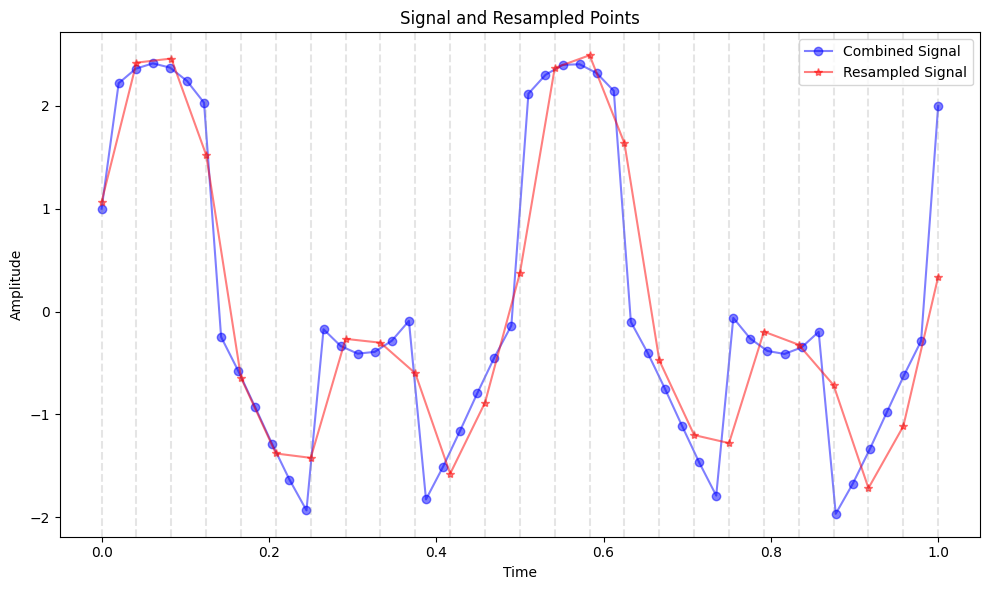

In [30]:
import torch
import torchaudio
import matplotlib.pyplot as plt
import numpy as np

# Create an x vector of 50 samples (not 1000 as your comment says)
x = torch.linspace(0, 1, 50)

# Create signal components
y = torch.sin(2 * np.pi * 2 * x)
z = torch.cos(2 * np.pi * 2 * x)
w = torch.sign(torch.sin(2 * np.pi * 4 * x))

# Combine all waves
signal = y + z + w

# Resample the signal with half the frequency: from 2 Hz → 1 Hz
resampled_signal = torchaudio.functional.resample(signal, orig_freq=2, new_freq=1)

# Time axis for resampled signal
x_resampled = torch.linspace(0, 1, resampled_signal.size(0))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x.numpy(), signal.numpy(), label='Combined Signal', color='blue', alpha=0.5, marker='o')
plt.plot(x_resampled.numpy(), resampled_signal.numpy(), label='Resampled Signal', marker='*', color='red', alpha=0.5)

# Add vertical lines at resampled time points
for t in x_resampled:
    plt.axvline(x=t.item(), color='grey', linestyle='--', alpha=0.2)


plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal and Resampled Points')
plt.legend()
plt.tight_layout()
plt.show()


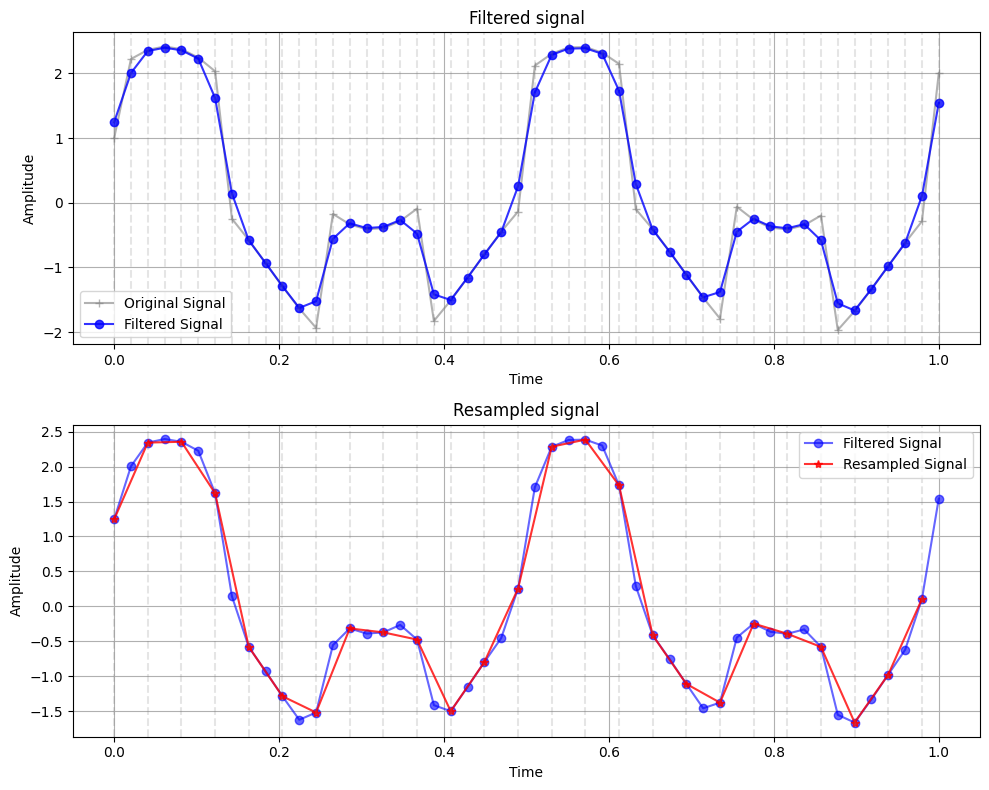

In [59]:
import torch
import torchaudio
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F


x = torch.linspace(0, 1, 50)
y = torch.sin(2 * np.pi * 2 * x)
z = torch.cos(2 * np.pi * 2 * x)
w = torch.sign(torch.sin(2 * np.pi * 4 * x))
signal = y + z + w  

# transform so it can be filtered
signal_reshaped = signal.view(1, 1, -1)

# filter
kernel = torch.tensor([0.2, 0.6, 0.2]).view(1, 1, -1)
filtered_signal = F.conv1d(F.pad(signal_reshaped, (1, 1), mode='replicate'), kernel).squeeze()



# resample to half
resampled_signal = filtered_signal[::2]
x_resampled = x[::2]

# plot
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(x, signal, color='gray', marker='+', label='Original Signal', alpha=0.6)
plt.plot(x, filtered_signal, 'blue', marker='o', label='Filtered Signal', alpha=0.8)

for t in x:
    plt.axvline(x=t.item(), color='gray', linestyle='--', alpha=0.2)


plt.title('Filtered signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(x, filtered_signal, color='blue', marker='o', alpha=0.6, label='Filtered Signal')
plt.plot(x_resampled, resampled_signal, color='red', marker='*', alpha=0.8, label='Resampled Signal')

for t in x_resampled:
    plt.axvline(x=t.item(), color='gray', linestyle='--', alpha=0.2)

plt.title('Resampled signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
